In [1]:
import pandas as pd
import math 
import sklearn
import numpy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [4]:

f = open(r'A:\Users\E2118\Documents\鄭景元\3D\109-鄭景元-畢業光碟\圖表\第四章\單目標最佳化\衝擊\L9_衝擊 J.csv')
 
df = pd.read_csv(f)
df['SN'] = 0


In [8]:
print(df)

   編號         X1         X2         X3  SN
0   1  85.083006  83.658022  80.820625   0
1   2  73.805499  73.805499  73.805499   0
2   3  64.193252  57.494370  61.496070   0
3   4  65.550350  71.033039  69.654430   0
4   5  79.408429  79.408429  76.597579   0
5   6  73.805499  71.033039  69.654430   0
6   7  79.408429  78.000711  79.408429   0
7   8  76.597579  75.199140  73.805499   0
8   9  78.000711  80.820625  73.805499   0


In [9]:
df['SN'] = 0


In [10]:

df['SN'] = df.apply(lambda x: (-10*math.log10((1/(x['X1'])**2 + 1/(x['X2'])**2 + 1/(x['X3'])**2)/3)) if x['X3'] > 0
                      else (-10*math.log10((1/(x['X1'])**2 + 1/(x['X2'])**2 )/2)), axis=1) 

In [11]:
df['A'] = [1,1,1,2,2,2,3,3,3]
df['B'] = [1,2,3,3,1,2,2,3,1]
df['C'] = [1,2,3,2,3,1,3,1,2]
df['D'] = [1,2,3,1,2,3,1,2,3]


In [8]:
df = df[['A','B','C','D','編號','X1','X2','X3','SN']]
df.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\衝擊強度SNJJ.xls')
df

,A,B,C,D,編號,X1,X2,X3,SN
0,1,1,1,1,1,85.083006,83.658022,80.820625,38.395156
1,1,2,2,2,2,73.805499,73.805499,73.805499,37.361774
2,1,3,3,3,3,64.193252,57.494370,61.496070,35.688420
3,2,3,2,1,4,65.550350,71.033039,69.654430,36.729619
4,2,1,3,2,5,79.408429,79.408429,76.597579,37.890462
5,2,2,1,3,6,73.805499,71.033039,69.654430,37.078331
6,3,2,3,1,7,79.408429,78.000711,79.408429,37.944925
7,3,3,1,2,8,76.597579,75.199140,73.805499,37.521448
8,3,1,2,3,9,78.000711,80.820625,73.805499,37.772537


In [12]:

seA = df.groupby("A").SN.mean()
dfAA = seA.to_frame()
dfA = dfAA.T
dfA.columns = ['level1', 'level2', 'level3']
dfA.index = ['A']
##
seB = df.groupby("B").SN.mean()
dfBB = seB.to_frame()
dfB = dfBB.T
dfB.columns = ['level1', 'level2', 'level3']
dfB.index = ['B']
##
seC = df.groupby("C").SN.mean()
dfCC = seC.to_frame()
dfC = dfCC.T
dfC.columns = ['level1', 'level2', 'level3']
dfC.index = ['C']
##
seD = df.groupby("D").SN.mean()
dfDD = seD.to_frame()
dfD = dfDD.T
dfD.columns = ['level1', 'level2', 'level3']
dfD.index = ['D']




In [10]:
dfB


,level1,level2,level3
B,38.019385,37.461677,36.646496


In [13]:
ANOVA = pd.concat([dfA, dfB,dfC,dfD],axis = 0)
ANOVA


,level1,level2,level3
A,37.148450,37.232804,37.746303
B,38.019385,37.461677,36.646496
C,37.664978,37.287977,37.174602
D,37.689900,37.591228,36.846429


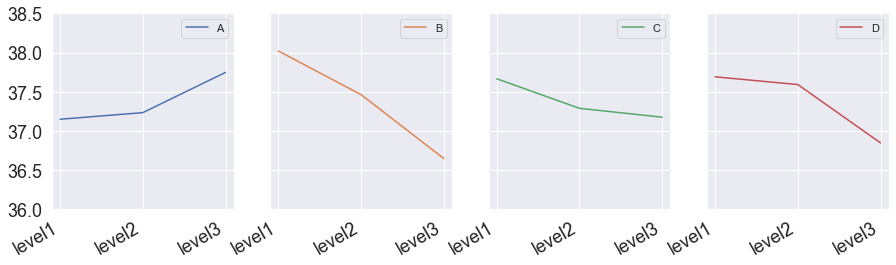

In [14]:
seA = df.groupby("A").SN.mean()
dfAA = seA.to_frame()
dfA = dfAA.T
dfA.columns = ['A1', 'A2', 'A3']
dfA.index = ['SN']
##
seB = df.groupby("B").SN.mean()
dfBB = seB.to_frame()
dfB = dfBB.T
dfB.columns = ['B1', 'B2', 'B3']
dfB.index = ['SN']
##
seC = df.groupby("C").SN.mean()
dfCC = seC.to_frame()
dfC = dfCC.T
dfC.columns = ['C1', 'C2', 'C3']
dfC.index = ['SN']
##
seD = df.groupby("D").SN.mean()
dfDD = seD.to_frame()
dfD = dfDD.T
dfD.columns = ['D1', 'D2', 'D3']
dfD.index = ['SN']
ANOVApic = pd.concat([dfA, dfB,dfC,dfD],axis = 1)
ANOVA.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\L9_回應表\衝擊回應表J.xlsx')
#ANOVApic.to_csv(R'A:\Users\E2118\Documents\鄭景元\3D\python\回應表.csv', index_label='Index_name')
ANOVAP = ANOVA.T.plot(kind='line',ylim=(36,38.5),subplots=True,figsize = (15,4),layout=(1,4),sharey=True,xticks=[0,1,2],fontsize = 18,legend = 18)



In [16]:
ANOVA['max'] =ANOVA.max(axis = 1)
M = df.loc[:,'SN'].mean()
seANOVA = ANOVA.loc[:,'max']
dfANOVA = seANOVA.to_frame()
dfANOVA.T
Amax = dfANOVA.T.loc['max','A']
Bmax = dfANOVA.T.loc['max','B']
Cmax = dfANOVA.T.loc['max','C']
Dmax = dfANOVA.T.loc['max','D']
bestSN = M + (Amax - M) + (Bmax - M) + (Cmax - M) +(Dmax-M)
best = (1/(10**(bestSN/-10)))**(0.5)
best

89.05338957349714

In [17]:
df['Mean square'] = (df['SN']-M)**2
meanSQ =  df.loc[:,'Mean square'].sum()
meanSQ
ANOVA = ANOVA.drop('max', axis = 1)
MA = ANOVA.loc['A',:].mean()
MB = ANOVA.loc['B',:].mean()
MC = ANOVA.loc['C',:].mean()
MD = ANOVA.loc['D',:].mean()

ANOVA.loc['A','Mean square'] = 3*(ANOVA.loc['A','level1']-MA)**2 + 3*(ANOVA.loc['A','level2']-MA)**2 + 3*(ANOVA.loc['A','level3']-MA)**2
ANOVA.loc['B','Mean square'] = 3*(ANOVA.loc['B','level1']-MB)**2 + 3*(ANOVA.loc['B','level2']-MB)**2 + 3*(ANOVA.loc['B','level3']-MB)**2
ANOVA.loc['C','Mean square'] = 3*(ANOVA.loc['C','level1']-MC)**2 + 3*(ANOVA.loc['C','level2']-MC)**2 + 3*(ANOVA.loc['C','level3']-MC)**2
ANOVA.loc['D','Mean square'] = 3*(ANOVA.loc['D','level1']-MD)**2 + 3*(ANOVA.loc['D','level2']-MD)**2 + 3*(ANOVA.loc['D','level3']-MD)**2
R = ANOVA.loc['C','Mean square']
ANOVA['F'] = ANOVA.apply(lambda x:(x['Mean square']/2)/(R/2),axis = 1)
ANOVA['Contribution(%)'] = ANOVA.apply(lambda x:x['Mean square']/meanSQ*100,axis = 1)
ANOVA.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\L9_回應表\衝擊回應表n.xlsx')
ANOVA

,level1,level2,level3,Mean square,F,Contribution(%)
A,37.148450,37.232804,37.746303,0.628226,1.588624,12.174998
B,38.019385,37.461677,36.646496,2.860382,7.233186,55.434139
C,37.664978,37.287977,37.174602,0.395453,1.000000,7.663862
D,37.689900,37.591228,36.846429,1.275905,3.226441,24.727001


In [15]:
MA

37.37585249009965

In [18]:
e1 = 87.94500566 
e2 = 87.94500566
e3 = 87.94500566

e = -10*math.log10((1/(e1)**2 + 1/(e2)**2 + 1/(e3)**2)/3)
R = abs( (e - bestSN)/bestSN )
CIp = abs(-1.96*(R)**(0.5))

CIe = abs(-1.96*((R)**(0.5))*((1+1/3)**(0.5)))
print(CIp,CIe)

0.10352568868826685 0.11954116846442452


In [19]:
e

38.884223623819565

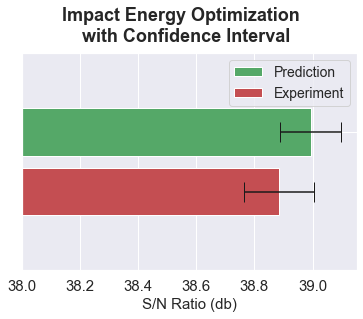

In [20]:
ind = numpy.arange(2)

lowbar = 38 # x軸底線位置
plt.barh(1,0, left  = lowbar,height= 0.3)
plt.barh(4,0, left  = lowbar,height= 0.3)

pr = plt.barh(3, bestSN-lowbar,  xerr = CIp,capsize = 10,left  = lowbar,height = 0.8,label =  'Prediction',tick_label='')
ex = plt.barh(2, e-lowbar,  xerr = CIe,capsize = 10,left  = lowbar,height = 0.8,label =  'Experiment',align='center')



plt.suptitle('Impact Energy Optimization \n with Confidence Interval', fontsize=18, y=1.04,fontweight='bold')

plt.xlabel('S/N Ratio (db)',fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc = 0,fontsize=14)


plt.show()

In [22]:
f2 = open(r'A:\Users\E2118\Documents\鄭景元\3D\109-鄭景元-畢業光碟\圖表\第四章\單目標最佳化\抗拉\L9_拉伸.csv')

df2 = pd.read_csv(f2)
df2['SN'] = 0

print(df2)

   編號       X1       X2       X3  SN
0   1  1023.83  1019.93     0.00   0
1   2  1132.67  1137.68  1115.04   0
2   3  1067.95  1072.97  1070.27   0
3   4  1013.45  1001.89  1004.19   0
4   5  1126.41  1145.98  1116.40   0
5   6  1051.43  1031.68  1043.29   0
6   7   993.43   981.73   964.83   0
7   8  1113.13  1099.85     0.00   0
8   9  1072.95  1049.92  1070.17   0


In [28]:
df2['SN'] = df2.apply(lambda x: (-10*math.log10((1/(x['X1'])**2 + 1/(x['X2'])**2 + 1/(x['X3'])**2)/3)) if x['X3'] > 0
                      else (-10*math.log10((1/(x['X1'])**2 + 1/(x['X2'])**2 )/2)), axis=1)
df2['A'] = [1,1,1,2,2,2,3,3,3]
df2['B'] = [1,2,3,3,1,2,2,3,1]
df2['C'] = [1,2,3,2,3,1,3,1,2]
df2['D'] = [1,2,3,1,2,3,1,2,3]
df2 = df2[['A','B','C','D','編號','X1','X2','X3','SN']]
#df2.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\抗拉sn.xlsx')
df2

,A,B,C,D,編號,X1,X2,X3,SN
0,1,1,1,1,1,1023.83,1019.93,0.00,60.187951
1,1,2,2,2,2,1132.67,1137.68,1115.04,61.048778
2,1,3,3,3,3,1067.95,1072.97,1070.27,60.590847
3,2,3,2,1,4,1013.45,1001.89,1004.19,60.056042
4,2,1,3,2,5,1126.41,1145.98,1116.40,61.056935
5,2,2,1,3,6,1051.43,1031.68,1043.29,60.357676
6,3,2,3,1,7,993.43,981.73,964.83,59.822615
7,3,3,1,2,8,1113.13,1099.85,0.00,60.878481
8,3,1,2,3,9,1072.95,1049.92,1070.17,60.540440


In [29]:
seA = df2.groupby("A").SN.mean()
df2AA = seA.to_frame()
df2A = df2AA.T
df2A.columns = ['level1', 'level2', 'level3']
df2A.index = ['A']
##
seB = df2.groupby("B").SN.mean()
df2BB = seB.to_frame()
df2B = df2BB.T
df2B.columns = ['level1', 'level2', 'level3']
df2B.index = ['B']
##
seC = df2.groupby("C").SN.mean()
df2CC = seC.to_frame()
df2C = df2CC.T
df2C.columns = ['level1', 'level2', 'level3']
df2C.index = ['C']
##
seD = df2.groupby("D").SN.mean()
df2DD = seD.to_frame()
df2D = df2DD.T
df2D.columns = ['level1', 'level2', 'level3']
df2D.index = ['D']
ANOVA2 = pd.concat([df2A, df2B,df2C,df2D],axis = 0)
ANOVA2

,level1,level2,level3
A,60.609192,60.490218,60.413845
B,60.595109,60.409690,60.508457
C,60.474702,60.548420,60.490133
D,60.022203,60.994731,60.496321


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266E5F58A58>,
      dtype=object)

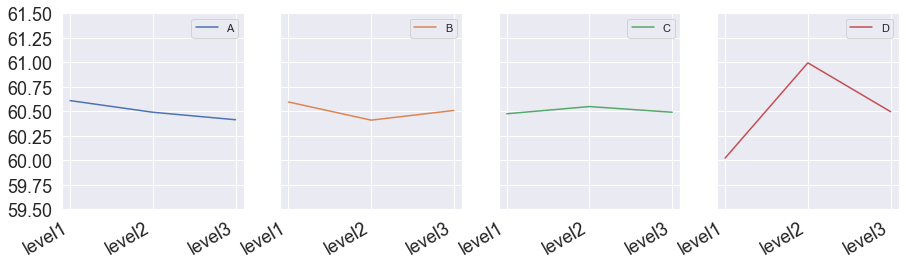

In [30]:
#ANOVA2.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\L9_回應表\抗拉回應表.xls')
ANOVAP2 = ANOVA2.T.plot(kind='line',ylim=(59.5,61.5),subplots=True,figsize = (15,4),layout=(1,4),sharey=True,xticks=[0,1,2],fontsize = 18)

ANOVAP2

In [31]:
ANOVA2['max'] =ANOVA2.max(axis = 1)
ANOVA2

,level1,level2,level3,max
A,60.609192,60.490218,60.413845,60.609192
B,60.595109,60.409690,60.508457,60.595109
C,60.474702,60.548420,60.490133,60.548420
D,60.022203,60.994731,60.496321,60.994731


In [32]:
M2 = df2.loc[:,'SN'].mean()

M2

60.50441834912902

In [33]:
seANOVA2 = ANOVA2.loc[:,'max']
dfANOVA2 = seANOVA2.to_frame()
dfANOVA2.T
A2max = dfANOVA2.T.loc['max','A']
B2max = dfANOVA2.T.loc['max','B']
C2max = dfANOVA2.T.loc['max','C']
D2max = dfANOVA2.T.loc['max','D']


In [34]:
df2['Mean square'] = (df2['SN']-M2)**2
meanSQ =  df2.loc[:,'Mean square'].sum()
meanSQ
ANOVA2 = ANOVA2.drop('max',axis = 1)
MA = ANOVA2.loc['A',:].mean()
MB = ANOVA2.loc['B',:].mean()
MC = ANOVA2.loc['C',:].mean()
MD = ANOVA2.loc['D',:].mean()

ANOVA2.loc['A','Mean square'] = 3*(ANOVA2.loc['A','level1']-MA)**2 + 3*(ANOVA2.loc['A','level2']-MA)**2 + 3*(ANOVA2.loc['A','level3']-MA)**2
ANOVA2.loc['B','Mean square'] = 3*(ANOVA2.loc['B','level1']-MB)**2 + 3*(ANOVA2.loc['B','level2']-MB)**2 + 3*(ANOVA2.loc['B','level3']-MB)**2
ANOVA2.loc['C','Mean square'] = 3*(ANOVA2.loc['C','level1']-MC)**2 + 3*(ANOVA2.loc['C','level2']-MC)**2 + 3*(ANOVA2.loc['C','level3']-MC)**2
ANOVA2.loc['D','Mean square'] = 3*(ANOVA2.loc['D','level1']-MD)**2 + 3*(ANOVA2.loc['D','level2']-MD)**2 + 3*(ANOVA2.loc['D','level3']-MD)**2
R2 = ANOVA2.loc['C','Mean square']
ANOVA2['F'] = ANOVA2.apply(lambda x:(x['Mean square']/2)/(R2/2),axis = 1)
ANOVA2['Contribution(%)'] = ANOVA2.apply(lambda x:x['Mean square']/meanSQ*100,axis = 1)
ANOVA2.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\L9_回應表\抗拉回應表n.xlsx')
ANOVA2


,level1,level2,level3,Mean square,F,Contribution(%)
A,60.609192,60.490218,60.413845,0.058148,6.411154,3.781056
B,60.595109,60.409690,60.508457,0.051644,5.694010,3.358112
C,60.474702,60.548420,60.490133,0.009070,1.000000,0.589762
D,60.022203,60.994731,60.496321,1.419013,156.454700,92.271069


In [27]:
#四個成分MAX剪掉MEAN
bestSN2 = M2 + (A2max - M2) + (B2max - M2) + (C2max - M2) +(D2max-M2)
best2 = (1/(10**(bestSN2/-10)))**(0.5)
bestSN2

61.23419684441066

In [28]:
e1 = 1139.6576
e2 = 1176.5164
e3 = 1183.5127
e = -10*math.log10((1/(e1)**2 + 1/(e2)**2 + 1/(e3)**2)/3)
R = abs( (e - bestSN2)/bestSN2 )
CIp = abs(-1.96*(R)**(0.5))

CIe = abs(-1.96*((R)**(0.5))*((1+1/3)**(0.5)))
print(CIp,CIe)
e

0.07935161147570943 0.09162734849226287


61.33456440871883

e1 = 1139.6576
e2 = 1176.5164
e3 = 1116.3683
UT1 = 1183.5127
UT2 = 1189.8499
UT3 = 1181.5375

NameError: name 'bestSN2' is not defined

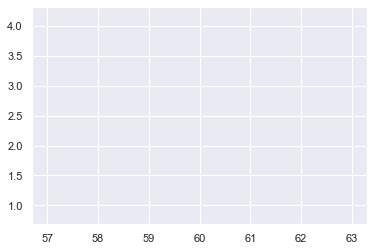

In [37]:

ind = numpy.arange(2)

lowbar = 60 # x軸底線位置
plt.barh(1,0,left  = lowbar,height= 0.3)
plt.barh(4,0,left  = lowbar,height= 0.3)

pr = plt.barh(3, bestSN2-lowbar,  xerr = CIp,capsize = 10,left  = lowbar,height = 0.8,label =  'Prediction',tick_label='')
ex = plt.barh(2, e-lowbar,  xerr = CIe,capsize = 10,left  = lowbar,height = 0.8,label =  'Experiment',align='center')

plt.suptitle('Tensile Strength Optimization \n with Confidence Interval\n  ',y=1.04 ,fontsize=18, fontweight='bold')
plt.xlabel('S/N Ratio (db)',fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc = 0,fontsize=14)

#plt.Artist.set_label('1','2')
#BAR靠近 座標軸 數字 文字 跟標題放大
plt.show()

In [38]:
f = open(r'A:\Users\E2118\Documents\鄭景元\3D\109-鄭景元-畢業光碟\圖表\第四章\單目標最佳化\伸長\L9_伸長率%.csv')#,encoding="utf-8"
 
df3 = pd.read_csv(f)
df3['SN'] = 0
df3['SN'] = df3.apply(lambda x: (-10*math.log10((1/(x['X1'])**2 + 1/(x['X2'])**2 + 1/(x['X3'])**2)/3)) if x['X3'] > 0
                      else (-10*math.log10((1/(x['X1'])**2 + 1/(x['X2'])**2 )/2)), axis=1)
df3['A'] = [1,1,1,2,2,2,3,3,3]
df3['B'] = [1,2,3,3,1,2,2,3,1]
df3['C'] = [1,2,3,2,3,1,3,1,2]
df3['D'] = [1,2,3,1,2,3,1,2,3]
df3 = df3[['A','B','C','D','編號','X1','X2','X3','SN']]
#df3.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\伸長率sn.xlsx')
df3

,A,B,C,D,編號,X1,X2,X3,SN
0,1,1,1,1,1,27.758235,28.610294,0.000000,28.997157
1,1,2,2,2,2,22.017353,23.495000,21.871176,27.015158
2,1,3,3,3,3,24.707059,23.380588,23.188824,27.506237
3,2,3,2,1,4,24.134706,27.023529,26.042059,28.180940
4,2,1,3,2,5,21.307059,25.394412,22.704412,27.217592
5,2,2,1,3,6,24.423529,26.257353,26.723529,28.212985
6,3,2,3,1,7,26.930000,27.003529,26.882941,28.607528
7,3,3,1,2,8,22.796471,21.739118,0.000000,26.946199
8,3,1,2,3,9,25.057647,26.662941,25.087059,28.154785


In [39]:
seA = df3.groupby("A").SN.mean()
df3AA = seA.to_frame()
df3A = df3AA.T
df3A.columns = ['level1', 'level2', 'level3']
df3A.index = ['A']
##
seB = df3.groupby("B").SN.mean()
df3BB = seB.to_frame()
df3B = df3BB.T
df3B.columns = ['level1', 'level2', 'level3']
df3B.index = ['B']
##
seC = df3.groupby("C").SN.mean()
df3CC = seC.to_frame()
df3C = df3CC.T
df3C.columns = ['level1', 'level2', 'level3']
df3C.index = ['C']
##
seD = df3.groupby("D").SN.mean()
df3DD = seD.to_frame()
df3D = df3DD.T
df3D.columns = ['level1', 'level2', 'level3']
df3D.index = ['D']
ANOVA3 = pd.concat([df3A, df3B,df3C,df3D],axis = 0)
ANOVA3


,level1,level2,level3
A,27.839517,27.870506,27.902838
B,28.123178,27.945224,27.544459
C,28.052114,27.783628,27.777119
D,28.595209,27.059650,27.958002


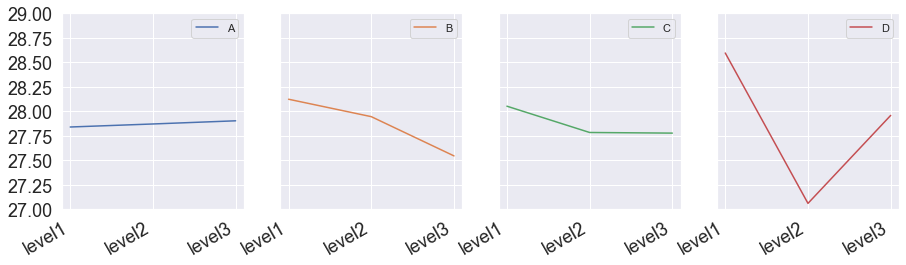

In [40]:
ANOVAP3 = ANOVA3.T.plot(kind='line',ylim=(27,29),subplots=True,figsize = (15,4),layout=(1,4),sharey=True,xticks=[0,1,2],fontsize = 18)

In [41]:
#ANOVA3.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\L9_回應表\伸長率回應表%.xls')
ANOVA3['max'] =ANOVA3.max(axis = 1)
ANOVA3

,level1,level2,level3,max
A,27.839517,27.870506,27.902838,27.902838
B,28.123178,27.945224,27.544459,28.123178
C,28.052114,27.783628,27.777119,28.052114
D,28.595209,27.059650,27.958002,28.595209


In [42]:
M3 = df3.loc[:,'SN'].mean()

M3

27.87095352630384

In [43]:
seANOVA3 = ANOVA3.loc[:,'max']
dfANOVA3 = seANOVA3.to_frame()
dfANOVA3.T
A3max = dfANOVA3.T.loc[:,'A']
B3max = dfANOVA3.T.loc[:,'B']
C3max = dfANOVA3.T.loc[:,'C']
D3max = dfANOVA3.T.loc[:,'D']


In [44]:
df3['Mean square'] = (df3['SN']-M3)**2
meanSQ =  df3.loc[:,'Mean square'].sum()
meanSQ
ANOVA3 = ANOVA3.drop('max',axis = 1)
MA = ANOVA3.loc['A',:].mean()
MB = ANOVA3.loc['B',:].mean()
MC = ANOVA3.loc['C',:].mean()
MD = ANOVA3.loc['D',:].mean()

ANOVA3.loc['A','Mean square'] = 3*(ANOVA3.loc['A','level1']-MA)**2 + 3*(ANOVA3.loc['A','level2']-MA)**2 + 3*(ANOVA3.loc['A','level3']-MA)**2
ANOVA3.loc['B','Mean square'] = 3*(ANOVA3.loc['B','level1']-MB)**2 + 3*(ANOVA3.loc['B','level2']-MB)**2 + 3*(ANOVA3.loc['B','level3']-MB)**2
ANOVA3.loc['C','Mean square'] = 3*(ANOVA3.loc['C','level1']-MC)**2 + 3*(ANOVA3.loc['C','level2']-MC)**2 + 3*(ANOVA3.loc['C','level3']-MC)**2
ANOVA3.loc['D','Mean square'] = 3*(ANOVA3.loc['D','level1']-MD)**2 + 3*(ANOVA3.loc['D','level2']-MD)**2 + 3*(ANOVA3.loc['D','level3']-MD)**2
R3 = ANOVA3.loc['A','Mean square']
ANOVA3['F'] = ANOVA3.apply(lambda x:(x['Mean square']/2)/(R3/2),axis = 1)

ANOVA3['Contribution(%)'] = ANOVA3.apply(lambda x:x['Mean square']/meanSQ*100,axis = 1)
ANOVA3.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\L9_回應表\伸長率回應表n.xlsx')
ANOVA3


,level1,level2,level3,Mean square,F,Contribution(%)
A,27.839517,27.870506,27.902838,0.006015,1.000000,0.141466
B,28.123178,27.945224,27.544459,0.527196,87.645418,12.398866
C,28.052114,27.783628,27.777119,0.147749,24.563060,3.474843
D,28.595209,27.059650,27.958002,3.571011,593.674029,83.984824


In [46]:
bestSN3 = M3 + (A3max - M3) + (B3max - M3) + (C3max - M3) +(D3max-M3)
best3 = (1/(10**(bestSN3/-10)))**(0.5)
best3


max    28.38075
dtype: float64

In [48]:
f = open(r'A:\Users\E2118\Documents\鄭景元\3D\109-鄭景元-畢業光碟\圖表\第四章\單目標最佳化\硬度\L9_HRC.csv')
 
df4 = pd.read_csv(f)
df4['SN'] = 0
#df4.loc[0,'X1'] = 31.6
#df4.loc[0,'X2'] = 31.7
#df4.loc[0,'X3'] = 31.6
df4['SN'] = df4.apply(lambda x: (-10*math.log10((1/(x['X1'])**2 + 1/(x['X2'])**2 + 1/(x['X3'])**2)/3)) if x['X3'] > 0
                      else (-10*math.log10((1/(x['X1'])**2 + 1/(x['X2'])**2 )/2)), axis=1)
df4['A'] = [1,1,1,2,2,2,3,3,3]
df4['B'] = [1,2,3,3,1,2,2,3,1]
df4['C'] = [1,2,3,2,3,1,3,1,2]
df4['D'] = [1,2,3,1,2,3,1,2,3]
#df4['0'] = [1,1,1,1,1,31.6,31.7,31.6,0]
df4 = df4[['A','B','C','D','編號','X1','X2','X3','SN']]
#df4.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\HRCsn.xlsx')
df4

,A,B,C,D,編號,X1,X2,X3,SN
0,1,1,1,1,1,31.3,31.1,34.1,30.125396
1,1,2,2,2,2,33.0,33.1,32.9,30.370199
2,1,3,3,3,3,33.3,33.7,33.2,30.474387
3,2,3,2,1,4,27.8,29.3,28.4,29.090841
4,2,1,3,2,5,30.7,31.1,30.6,29.770377
5,2,2,1,3,6,32.8,33.8,33.3,30.446926
6,3,2,3,1,7,31.3,31.0,31.5,29.901068
7,3,3,1,2,8,30.1,29.5,30.2,29.521700
8,3,1,2,3,9,26.3,27.9,28.3,28.773456


In [49]:
(1/(10**(30.002870/-10)))**(0.5)

31.63322715635918

In [50]:
seA = df4.groupby("A").SN.mean()
df4AA = seA.to_frame()
df4A = df4AA.T
df4A.columns = ['level1', 'level2', 'level3']
df4A.index = ['A']
##
seB = df4.groupby("B").SN.mean()
df4BB = seB.to_frame()
df4B = df4BB.T
df4B.columns = ['level1', 'level2', 'level3']
df4B.index = ['B']
##
seC = df4.groupby("C").SN.mean()
df4CC = seC.to_frame()
df4C = df4CC.T
df4C.columns = ['level1', 'level2', 'level3']
df4C.index = ['C']
##
seD = df4.groupby("D").SN.mean()
df4DD = seD.to_frame()
df4D = df4DD.T
df4D.columns = ['level1', 'level2', 'level3']
df4D.index = ['D']
ANOVA4 = pd.concat([df4A, df4B,df4C,df4D],axis = 0)
ANOVA4


,level1,level2,level3
A,30.323327,29.769381,29.398741
B,29.556410,30.239398,29.695643
C,30.031340,29.411499,30.048611
D,29.705768,29.887425,29.898257


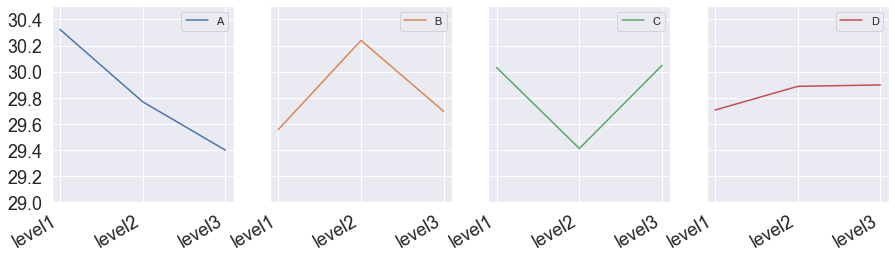

In [51]:
#ANOVA4.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\L9_回應表\HRC回應表.xls')
ANOVAP4 = ANOVA4.T.plot(kind='line',ylim=(29,30.5),subplots=True,figsize = (15,4),layout=(1,4),sharey=True,xticks=[0,1,2],fontsize = 18)

In [52]:
ANOVA4['max'] =ANOVA4.max(axis = 1)
M4 = df4.loc[:,'SN'].mean()

seANOVA4 = ANOVA4.loc[:,'max']
dfANOVA4 = seANOVA4.to_frame()
dfANOVA4.T
A4max = dfANOVA4.T.loc['max','A']
B4max = dfANOVA4.T.loc['max','B']
C4max = dfANOVA4.T.loc['max','C']
D4max = dfANOVA4.T.loc['max','D']
bestSN4 = M4 + (A4max - M4) + (B4max - M4) + (C4max - M4) +(D4max-M4)
best4 = (1/(10**(bestSN4/-10)))**(0.5)
bestSN4


31.01814217839695

In [53]:
df4['Mean square'] = (df4['SN']-M4)**2
meanSQ =  df4.loc[:,'Mean square'].sum()
meanSQ
ANOVA4 = ANOVA4.drop('max',axis = 1)
MA = ANOVA4.loc['A',:].mean()
MB = ANOVA4.loc['B',:].mean()
MC = ANOVA4.loc['C',:].mean()
MD = ANOVA4.loc['D',:].mean()

ANOVA4.loc['A','Mean square'] = 3*(ANOVA4.loc['A','level1']-MA)**2 + 3*(ANOVA4.loc['A','level2']-MA)**2 + 3*(ANOVA4.loc['A','level3']-MA)**2
ANOVA4.loc['B','Mean square'] = 3*(ANOVA4.loc['B','level1']-MB)**2 + 3*(ANOVA4.loc['B','level2']-MB)**2 + 3*(ANOVA4.loc['B','level3']-MB)**2
ANOVA4.loc['C','Mean square'] = 3*(ANOVA4.loc['C','level1']-MC)**2 + 3*(ANOVA4.loc['C','level2']-MC)**2 + 3*(ANOVA4.loc['C','level3']-MC)**2
ANOVA4.loc['D','Mean square'] = 3*(ANOVA4.loc['D','level1']-MD)**2 + 3*(ANOVA4.loc['D','level2']-MD)**2 + 3*(ANOVA4.loc['D','level3']-MD)**2

R4 = ANOVA4.loc['D','Mean square']
ANOVA4['F'] = ANOVA4.apply(lambda x:(x['Mean square']/2)/(R4/2),axis = 1)

ANOVA4['Contribution(%)'] = ANOVA4.apply(lambda x:x['Mean square']/meanSQ*100,axis = 1)
ANOVA4.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\L9_回應表\硬度回應表n2.xlsx')
ANOVA4


,level1,level2,level3,Mean square,F,Contribution(%)
A,30.323327,29.769381,29.398741,1.299089,18.513876,44.168698
B,29.556410,30.239398,29.695643,0.781528,11.137889,26.571750
C,30.031340,29.411499,30.048611,0.790413,11.264516,26.873844
D,29.705768,29.887425,29.898257,0.070168,1.000000,2.385708


In [54]:
e1 = 31.6
e2 = 31.7
e3 = 31.6
e = -10*math.log10((1/(e1)**2 + 1/(e2)**2 + 1/(e3)**2)/3)
R = abs( (e - bestSN4)/bestSN4 )
#預測值信賴區間 (Predicted Confidence Interval)
CIp = abs(-1.96*(R)**(0.5))

CIe = abs(-1.96*((R)**(0.5))*((1+1/3)**(0.5)))
print(CIp,CIe)

0.3546005190883445 0.4094574103008734


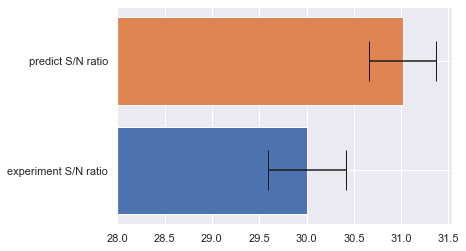

In [56]:
#barh_width = 100
ind = numpy.arange(2)

lowbar = 28 # x軸底線位置
plt.barh('experiment S/N ratio', e-lowbar,  xerr = CIe,capsize = 20,left  = lowbar)
plt.barh('predict S/N ratio', bestSN4-lowbar,  xerr = CIp,capsize = 20,left  = lowbar)




plt.show()

In [46]:
##以下PCA

## PCA 流程
* 先將PCA模型根據其資料維度(成分數量)建起
* 資料降維
* 資料正規化
* 從模型取得 EIGENVECTOR
* 正規化資料與轉置 EIGENVECTOR 內積，得出各個向量貢獻程度
* 最後從訓練的 PCA 模型得出 explained variance 組合，得到各個成分貢獻程度

In [96]:
df

,編號,X1,X2,X3,SN,A,B,C,D,Mean square
0,1,85.083006,83.658022,80.820625,38.395156,1,1,1,1,1.038980
1,2,73.805499,73.805499,73.805499,37.361774,1,2,2,2,0.000198
2,3,64.193252,57.494370,61.496070,35.688420,1,3,3,3,2.847427
3,4,65.550350,71.033039,69.654430,36.729619,2,3,2,1,0.417618
4,5,79.408429,79.408429,76.597579,37.890462,2,1,3,2,0.264823
5,6,73.805499,71.033039,69.654430,37.078331,2,2,1,3,0.088519
6,7,79.408429,78.000711,79.408429,37.944925,3,2,3,1,0.323844
7,8,76.597579,75.199140,73.805499,37.521448,3,3,1,2,0.021198
8,9,78.000711,80.820625,73.805499,37.772537,3,1,2,3,0.157358


In [62]:
#四個成分訊雜比中取最大，因為望大
#衝擊
X1 = df.loc[:, ['SN']].values
#L9_拉伸
X2 = df2.loc[:, ['SN']].values
#伸長率
X3 = df3.loc[:, ['SN']].values
#HRC硬度的訊雜比
X4 = df4.loc[:, ['SN']].values
X = numpy.hstack((X1,X2,X3,X4))
#scaler = sklearn.preprocessing.MinMaxScaler().fit(X)
X

array([[38.39515596, 60.18795054, 28.99715712, 30.12539551],
       [37.36177442, 61.04877811, 27.01515777, 30.37019904],
       [35.68842029, 60.59084712, 27.50623697, 30.47438708],
       [36.72961913, 60.05604209, 28.18094009, 29.09084103],
       [37.89046169, 61.05693529, 27.21759166, 29.77037694],
       [37.07833087, 60.35767604, 28.21298519, 30.44692614],
       [37.94492519, 59.82261538, 28.60752832, 29.90106776],
       [37.52144824, 60.87848068, 26.94619928, 29.52169954],
       [37.77253663, 60.54043989, 28.15478532, 28.77345644]])

In [109]:
PCA(n_components=4)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [100]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
pca = PCA(n_components=4)
#訓練模型
data_pca = pca.fit_transform(X)

In [101]:
StandardScaler().fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
"""X = [[ 0.851, 0.283,  0.739],
       [1 , 0 , 0.178  ],
       [0 , 1 , 1],
       [0.673, 0.454,  0.688],
       [ 0.485,  0.704, 0.091],
       [0.554, 0.5,  0.199],
       [0.990, 0.092,  0],
       [ 0.960,  .750, 0.348],
       [ .267,  0.901,  0.663]]
#scaler = sklearn.preprocessing.MinMaxScaler().fit(X)
#scaler = StandardScaler().fit(X)
#X = scaler.transform(X)
pca = PCA(n_components=3)
data_pca = pca.fit_transform(X)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-59-c453683aca38>, line 14)

In [102]:
#正規化後的母資料
X

array([[ 1.3461746 , -0.76557962,  1.63848697,  0.51588375],
       [-0.01859264,  1.31688194, -1.245077  ,  0.94411338],
       [-2.22855945,  0.20908321, -0.53061749,  1.12636733],
       [-0.85346805, -1.0846845 ,  0.45099213, -1.29384056],
       [ 0.67963453,  1.33661528, -0.95056073, -0.10514275],
       [-0.39293111, -0.35499004,  0.49761378,  1.07833048],
       [ 0.75156344, -1.64937617,  1.07162525,  0.12347195],
       [ 0.19228552,  0.90490877, -1.34540308, -0.54014887],
       [ 0.52389316,  0.08714112,  0.41294017, -1.84903471]])

In [65]:
eigenvector = pca.components_
print(eigenvector)


[[ 0.31173402 -0.63474288  0.67444066 -0.21225732]
 [-0.61804411 -0.32888194  0.19254015  0.68759468]
 [-0.68505376 -0.21286574 -0.10065873 -0.68938911]
 [ 0.22703466 -0.66605279 -0.70563865  0.08308452]]


In [66]:
#模型訓練完後的EIGENVECTOR
Y = - (eigenvector)
""""I = [[1,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,-1]
    ]
Y = numpy.dot(I,Y)"""
eigenV = pd.DataFrame(Y,index=['V1','V2','V3','V4'],columns = ['衝擊韌性','抗拉強度','伸長率','HRC'])



#eigenV.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\L9_回應表\PCA特徵向量n.xlsx')
eigenV

,衝擊韌性,抗拉強度,伸長率,HRC
V1,-0.311734,0.634743,-0.674441,0.212257
V2,0.618044,0.328882,-0.192540,-0.687595
V3,0.685054,0.212866,0.100659,0.689389
V4,-0.227035,0.666053,0.705639,-0.083085


In [67]:
Y = numpy.transpose(Y)
#要放後面內積所以要transpose

In [112]:
Z=numpy.dot(X,Y)
numpy.set_printoptions(linewidth=100)
#與特徵轉置向量內積得正交值
Z

array([[-1.90115676, -0.08998349,  1.27980895,  0.29777306],
       [ 1.88180293,  0.01216759,  0.79311571, -0.0756816 ],
       [ 1.42438159, -1.98090335, -0.75908228,  0.17721279],
       [-1.0012353 , -0.08141024, -1.66212697, -0.10295471],
       [ 1.25532132,  1.11494944,  0.58193929,  0.07393909],
       [-0.20956483, -1.1968635 ,  0.44873431,  0.11430982],
       [-1.97775749, -0.36918023,  0.35675433, -0.52328095],
       [ 1.30718645,  1.04689668, -0.18344932, -0.34542888],
       [-0.77897791,  1.54432709, -0.85569403,  0.38411139]])

In [69]:
PCA_result = pd.DataFrame(Z,index=['1','2','3','4','5','6','7','8','9'],columns = ['PC1','PC2','PC3','PC4'])
PCA_result.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\L9_回應表\PCA結果(四目標).xlsx')

In [113]:
#每個不同訊雜比的貢獻度
PCA_result 

,PC1,PC2,PC3,PC4
1,-1.901157,-0.089983,1.279809,0.297773
2,1.881803,0.012168,0.793116,-0.075682
3,1.424382,-1.980903,-0.759082,0.177213
4,-1.001235,-0.081410,-1.662127,-0.102955
5,1.255321,1.114949,0.581939,0.073939
6,-0.209565,-1.196864,0.448734,0.114310
7,-1.977757,-0.369180,0.356754,-0.523281
8,1.307186,1.046897,-0.183449,-0.345429
9,-0.778978,1.544327,-0.855694,0.384111


In [108]:
#從訓練的模型得出合理的變異數比例分布
dfP=pca.explained_variance_ratio_
dfP = pd.DataFrame([dfP], columns = ['K1', 'K2', 'K3','K4'],index = ['variance_ratio'])
#dfP.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\L9_回應表\PCA寄予率(四目標)n.xlsx')

print(0.500937+0.284213+0.195527+0.019323)
print(dfP)

1.0
                      K1        K2        K3        K4
variance_ratio  0.500937  0.284213  0.195527  0.019323


### 以上PCA

In [111]:
P1=dfP.at['variance_ratio', 'K1']
P2=dfP.at['variance_ratio', 'K2']
P3=dfP.at['variance_ratio', 'K3']
P4=dfP.at['variance_ratio', 'K4']
P1

0.5009369750040691

In [74]:
dfPCA = pd.DataFrame(Z,columns=['K1','K2','K3','K4'])
dfPCA['SN'] = 0
dfPCA

,K1,K2,K3,K4,SN
0,-1.901157,-0.089983,1.279809,0.297773,0
1,1.881803,0.012168,0.793116,-0.075682,0
2,1.424382,-1.980903,-0.759082,0.177213,0
3,-1.001235,-0.081410,-1.662127,-0.102955,0
4,1.255321,1.114949,0.581939,0.073939,0
5,-0.209565,-1.196864,0.448734,0.114310,0
6,-1.977757,-0.369180,0.356754,-0.523281,0
7,1.307186,1.046897,-0.183449,-0.345429,0
8,-0.778978,1.544327,-0.855694,0.384111,0


In [75]:
dfPCA['SN'] = dfPCA.apply(lambda x: x['K1']*P1 + x['K2']*P2 + x['K3']*P3 + x['K4']*P4 , axis=1)

In [61]:
#dfPCA.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\L9_回應表\PCA綜合指標(四目標)n.xlsx')

In [114]:
dfPCA

,K1,K2,K3,K4,SN,A,B,C,D,Mean square
0,-1.901157,-0.089983,1.279809,0.297773,-0.721943,1,1,1,1,0.521202
1,1.881803,0.012168,0.793116,-0.075682,1.099736,1,2,2,2,1.209419
2,1.424382,-1.980903,-0.759082,0.177213,0.005530,1,3,3,3,0.000031
3,-1.001235,-0.081410,-1.662127,-0.102955,-0.851674,2,3,2,1,0.725348
4,1.255321,1.114949,0.581939,0.073939,1.060934,2,1,3,2,1.125581
5,-0.209565,-1.196864,0.448734,0.114310,-0.355195,2,2,1,3,0.126163
6,-1.977757,-0.369180,0.356754,-0.523281,-1.036014,3,2,3,1,1.073325
7,1.307186,1.046897,-0.183449,-0.345429,0.909816,3,3,1,2,0.827765
8,-0.778978,1.544327,-0.855694,0.384111,-0.111190,3,1,2,3,0.012363


In [115]:
dfPCA['A'] = [1,1,1,2,2,2,3,3,3]
dfPCA['B'] = [1,2,3,3,1,2,2,3,1]
dfPCA['C'] = [1,2,3,2,3,1,3,1,2]
dfPCA['D'] = [1,2,3,1,2,3,1,2,3]

In [78]:
seA = dfPCA.groupby("A").SN.mean()#負號因為PCA預設的特徵向量會是負向，也就是主成分軸的方向是負向
dfPCA_AA = seA.to_frame()
dfPCA_A = dfPCA_AA.T
dfPCA_A.columns = ['level1', 'level2', 'level3']
dfPCA_A.index = ['A']
##
seB = dfPCA.groupby("B").SN.mean()
dfPCA_BB = seB.to_frame()
dfPCA_B = dfPCA_BB.T
dfPCA_B.columns = ['level1', 'level2', 'level3']
dfPCA_B.index = ['B']
##
seC = dfPCA.groupby("C").SN.mean()
dfPCA_CC = seC.to_frame()
dfPCA_C = dfPCA_CC.T
dfPCA_C.columns = ['level1', 'level2', 'level3']
dfPCA_C.index = ['C']
##
seD = dfPCA.groupby("D").SN.mean()
dfPCA_DD = seD.to_frame()
dfPCA_D = dfPCA_DD.T
dfPCA_D.columns = ['level1', 'level2', 'level3']
dfPCA_D.index = ['D']
ANOVAPCA = pd.concat([dfPCA_A, dfPCA_B, dfPCA_C, dfPCA_D],axis = 0)#如果主成分軸的方向為負向，需加負號轉正。
ANOVAPCA


,level1,level2,level3
A,0.127774,-0.048645,-0.079129
B,0.075934,-0.097158,0.021224
C,-0.055774,0.045624,0.010150
D,-0.869877,1.023495,-0.153618


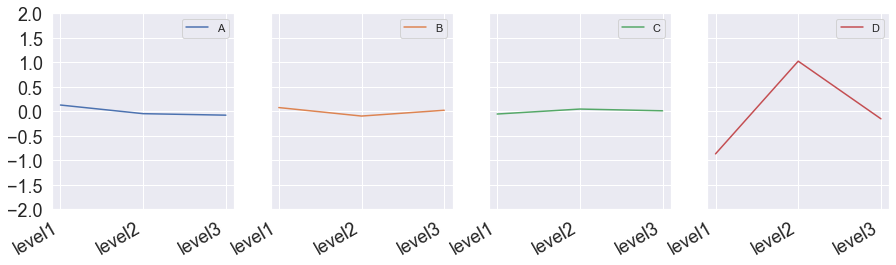

In [79]:
#ANOVAPCA.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\PCA_回應表n.xlsx')
ANOVAPCApic = ANOVAPCA.T.plot(kind='line',ylim=(-2,2),subplots=True,figsize = (15,4),layout=(1,4),sharey=True,xticks=[0,1,2],fontsize=18)

In [80]:
MPCA = dfPCA.loc[:,'SN'].mean()
MPCA

8.897203961232158e-16

In [81]:
ANOVAPCA['max'] =ANOVAPCA.max(axis = 1)
ANOVAPCA

,level1,level2,level3,max
A,0.127774,-0.048645,-0.079129,0.127774
B,0.075934,-0.097158,0.021224,0.075934
C,-0.055774,0.045624,0.010150,0.045624
D,-0.869877,1.023495,-0.153618,1.023495


In [82]:
seANOVAPCA = ANOVAPCA.loc[:,'max']
dfANOVAPCA = seANOVAPCA.to_frame()
dfANOVAPCA.T
APCA_max = dfANOVAPCA.T.loc['max','A']
BPCA_max = dfANOVAPCA.T.loc['max','B']
CPCA_max = dfANOVAPCA.T.loc['max','C']
DPCA_max = dfANOVAPCA.T.loc['max','D']

In [83]:
dfPCA['Mean square'] = (dfPCA['SN']-MPCA)**2
meanSQ =  dfPCA.loc[:,'Mean square'].sum()
meanSQ
ANOVAPCA = ANOVAPCA.drop('max',axis = 1)
MA = ANOVAPCA.loc['A','level1':'level3'].mean()
MB = ANOVAPCA.loc['B','level1':'level3'].mean()
MC = ANOVAPCA.loc['C','level1':'level3'].mean()
MD = ANOVAPCA.loc['D','level1':'level3'].mean()

ANOVAPCA.loc['A','Mean square'] = 3*(ANOVAPCA.loc['A','level1']-MA)**2 + 3*(ANOVAPCA.loc['A','level2']-MA)**2 + 3*(ANOVAPCA.loc['A','level3']-MA)**2
ANOVAPCA.loc['B','Mean square'] = 3*(ANOVAPCA.loc['B','level1']-MB)**2 + 3*(ANOVAPCA.loc['B','level2']-MB)**2 + 3*(ANOVAPCA.loc['B','level3']-MB)**2
ANOVAPCA.loc['C','Mean square'] = 3*(ANOVAPCA.loc['C','level1']-MC)**2 + 3*(ANOVAPCA.loc['C','level2']-MC)**2 + 3*(ANOVAPCA.loc['C','level3']-MC)**2
ANOVAPCA.loc['D','Mean square'] = 3*(ANOVAPCA.loc['D','level1']-MD)**2 + 3*(ANOVAPCA.loc['D','level2']-MD)**2 + 3*(ANOVAPCA.loc['D','level3']-MD)**2

RPCA = ANOVAPCA.loc['C','Mean square']
ANOVAPCA['F'] = ANOVAPCA.apply(lambda x:(x['Mean square']/2)/(RPCA/2),axis = 1)

ANOVAPCA['Contribution(%)'] = ANOVAPCA.apply(lambda x:x['Mean square']/meanSQ*100,axis = 1)
ANOVAPCA.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\L9_回應表\PCA回應表n.xlsx')
ANOVAPCA


,level1,level2,level3,Mean square,F,Contribution(%)
A,0.127774,-0.048645,-0.079129,0.074862,4.712452,1.331779
B,0.075934,-0.097158,0.021224,0.046968,2.956563,0.835550
C,-0.055774,0.045624,0.010150,0.015886,1.000000,0.282609
D,-0.869877,1.023495,-0.153618,5.483481,345.177358,97.550063


In [84]:
#最佳的訊雜比后取log
bestSNPCA = MPCA + (APCA_max - MPCA) + (BPCA_max - MPCA) + (CPCA_max - MPCA) +(DPCA_max - MPCA)
bestPCA = (1/(10**(bestSNPCA/-10)))**(0.5)
bestSNPCA


1.2728272015858935

In [85]:
#impact energy 量測值
IM1 = 82.237192
IM2 = 79.40842906
IM3 = 82.237192
#降低幅度
IM = -10*math.log10((1/(IM1)**2 + 1/(IM2)**2 + 1/(IM3)**2)/3)
# Tensile Strength 量測值
UT1 = 1183.5127
UT2 = 1189.8499
UT3 = 1181.5375
UT = -10*math.log10((1/(UT1)**2 + 1/(UT2)**2 + 1/(UT3)**2)/3)
# Elongation (%) 量測值
EL1 = 27.4003
EL2 = 21.1769
EL3 = 24.4639
EL = -10*math.log10((1/(EL1)**2 + 1/(EL2)**2 + 1/(EL3)**2)/3)
#硬度 量測值
HD1 = 32.5
HD2 = 31.9
HD3 = 31.6
HD = -10*math.log10((1/(HD1)**2 + 1/(HD2)**2 + 1/(HD3)**2)/3)

In [86]:
BEST = [[IM,UT,EL,HD]
       ]
BEST

[[38.197638019276106,
  61.47400650889015,
  27.58395819533959,
  30.101228640858622]]

In [87]:
#四種成分的 VARIANCE RATIO
PP = numpy.array([P1,P2,P3,P4])
PP = PP.transpose()

PP

array([0.50093698, 0.28421328, 0.19552697, 0.01932277])

In [88]:
#正規化
BEST = scaler.transform(BEST)
#BEST 與 Y 內積
BEPCA=numpy.dot(BEST,Y)
#四組最佳化的訊雜比乘上主成分 的組合
BEPCA

array([[1.53263768, 1.19693116, 1.52726296, 0.98188416]])

In [89]:
#主成分與VARIANCE內積後再內積
STfactor = numpy.dot(BEPCA,PP)#1.52256507
STfactor


array([1.42553244])

In [90]:
e = 1.42553244 
R = abs( (e - bestSNPCA)/bestSNPCA )
CIp = abs(-1.96*(R)**(0.5))

CIe = abs(-1.96*((R)**(0.5))*((1+1/3)**(0.5)))
print(CIp,CIe)
R

0.6788882858470126 0.7839126691669126


0.11997326756046832

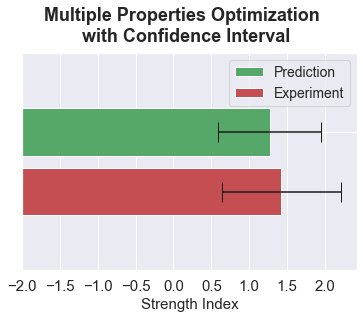

In [91]:
ind = numpy.arange(2)

lowbar = -2 # x軸底線位置
plt.barh(1,0,left  = lowbar,height= 0.3)
plt.barh(4,0,left  = lowbar,height= 0.3)
pr = plt.barh(3, bestSNPCA-lowbar,  xerr = CIp,capsize = 10,left  = lowbar,height = 0.8,label =  'Prediction',tick_label='')
ex = plt.barh(2, e-lowbar,  xerr = CIe,capsize = 10,left  = lowbar,height = 0.8,label =  'Experiment',align='center')

plt.suptitle('Multiple Properties Optimization \n with Confidence Interval', fontsize=18,y=1.04, fontweight='bold')

plt.xlabel('Strength Index',fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc = 0,fontsize=14)


plt.show()

In [43]:
#array

In [95]:
#best3real = scaler.inverse_transform(best3)
-0.625+0.403+0.669

0.44700000000000006

In [45]:
#df3.to_excel(r'A:\Users\E2118\Documents\鄭景元\3D\python\PCA_硬度密度.xls')

In [94]:
0.434294395+0.316778274+0.248927331

1.0